<a href="https://colab.research.google.com/github/aeternum-dev/nlp-zsz/blob/master/NLP_project_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLP Project

### Loading dependencies [0]

In [2]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install matplotlib
!pip install transformers
!pip install sentencepiece

In [3]:
!rm -r sample_data
!rm -r resources
!git clone https://github.com/aeternum-dev/nlp-zzsz.git
!mv nlp-zzsz resources

rm: cannot remove 'resources': No such file or directory
Cloning into 'nlp-zzsz'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 3), reused 4 (delta 1), pack-reused 0
Receiving objects: 100% (16/16), 38.51 KiB | 1.54 MiB/s, done.
Resolving deltas: 100% (3/3), done.


### Scraping data from Rotten Tomatoes[1]

In [4]:
from resources import data_transform as dt
import pandas as pd

movie_titles = list()
with open("resources/source.txt", 'r') as file:
    for line in file:
        movie_titles.append(line.strip())

reviews_df = pd.DataFrame()

for movie in movie_titles:
    movie_url = f"https://www.rottentomatoes.com/m/{movie}/reviews"
    html_code = dt.get_rotten_tomatoes_html(movie_url)
    df = dt.get_comments(html_code, movie)

    reviews_df = pd.concat([reviews_df, df], ignore_index=True)


print(f"{reviews_df['Movie'].nunique()} movies loaded, {len(reviews_df)} reviews loaded")

#reviews_df.to_excel("resources/reviews.xlsx", index=False)

6 movies loaded, 111 reviews loaded


### Sentiment Analysis [2]

#### Concatenate dataframe with results [2.a]

In [5]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [20]:
review_sentiments = pd.DataFrame(classifier(list(reviews_df["Review Text"])))


review_sentiments.rename(columns={"label" : "Sentiment",
                                  "score" : "Sentiment Score"},
                          inplace=True)
reviews_df = pd.concat([reviews_df,review_sentiments], axis=1)

review_sentiments


,Sentiment,Sentiment Score
0,POSITIVE,0.999796
1,POSITIVE,0.999808
2,POSITIVE,0.999445
3,POSITIVE,0.999861
4,POSITIVE,0.999878
...,...,...
106,POSITIVE,0.984347
107,NEGATIVE,0.999640
108,NEGATIVE,0.996727
109,POSITIVE,0.989956


#### Visualize POSITIVE/NEGATIVE ratios [2.b]



<Axes: title={'center': 'Sentiment ratios on a per movie basis'}, xlabel='Movie'>

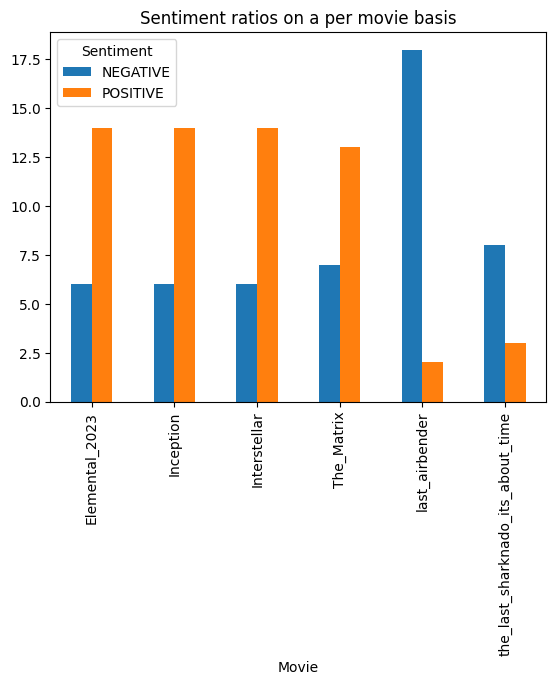

In [7]:
movie_review_sentiment_count = reviews_df[["Movie", "Sentiment"]].groupby("Movie")["Sentiment"].value_counts().unstack().reset_index()
movie_review_sentiment_count.plot(x="Movie",
                                  kind = "bar",
                                  stacked=False,
                                  title ="Sentiment ratios on a per movie basis")

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus tristique elementum imperdiet. Duis ornare libero cursus volutpat accumsan. Aenean pulvinar condimentum neque at a

#### Examples of low certainty scores

> While the classifier has been able to classify the majority of sample materials with to close to 1.00 certainty scores, there have been some some notable outliers with below 0.75 scores.

In [ ]:
print(reviews_df.sort_values("Sentiment Score"))

In [ ]:
#Experiment Cell
outlier_df = reviews_df.sort_values("Sentiment Score").head(2)#.iloc[0]["Review Text"]
pd.options.display.max_colwidth = 300

print(outlier_df[["Review Text"]],index=False)


#print(reviews_df.sort_values(by="Sentiment Score").head(2)).iloc[0]["Review Text"]


                                                                                                                                                                                                               Review Text
43  The Wachowskis seem to be saying that while state-of-the-art effects speak for themselves, loud and clear, there's still room amid all the kicking and shooting and shouting for the carefully observed human emotion.
13                         It's not nearly as confusing as many make it out to be, but if you do find yourself losing the plot a bit, remember you're at the movies and just let it overwhelm you. That's part of the fun.


In case of the above examples, we can sse


### Zero-shot Classification [3]

In [22]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

#### Concatanate dataframe with results

In [ ]:
label_groups = [["emotional review","balanced review", "factual review"],
                ["white reviewer", "black reviewer", "asian reviewer"],
                ["positive review", "netrual review", "negative review"],
                ["off-topic", "on-topic"]]

#movie_review_sentiment_count = reviews_df[["Movie", "Sentiment"]].groupby("Movie")["Sentiment"].value_counts().unstack().reset_index()


elso = pd.DataFrame(classifier(list(reviews_df["Review Text"]), candidate_labels=label_groups[0]))
elso
#lso.groupby("Movie")






run zero-shot classification for chosen example with every label group:

In [ ]:
import matplotlib.pyplot as plt

chosen_example = "Still one of the best original films of the last 25 years, Inception is a groundbreaking action drama with some of the most intricate plot mapping this side of dreams and reality."
results = list()


classifier(chosen_example, candidate_labels=label_groups[1])

for label_group in label_groups:
  results.append(pd.DataFrame(classifier(chosen_example, candidate_labels=label_group)).plot(
                                  x = "labels",
                                  kind = "bar",
                                  stacked=False))

#x = [A]


#fig, axs = plt().subplots(2, 2)
#axs[0, 0].hist(results[0])
#axs[0, 1].hist(results[1])
#axs[1, 0].hist(results[2])
#axs[1, 1].hist(results[3])

#plt.show()



# Comparison between the Last Airbender and Interstellar

In [33]:
custom_sentiment_labels = [
    'GOOD',
    'BAD',
    'NEUTRAL',
    'EXCELLENT']

interstellar_df = reviews_df[reviews_df["Movie"] == "Interstellar"]

last_airbernder_df = reviews_df[reviews_df["Movie"] == "last_airbender"]

review_sentiments = pd.DataFrame(classifier(list(reviews_df["Review Text"]), candidate_labels=custom_sentiment_labels))

#list(reviews_df["Review Text"])

#
#import seaborn as sns
#import matplotlib.pyplot as plt
#
#plt.figure(figsize=(8,8))
#sentiment_counts = df['Sentiment'].value_counts()
#sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=None)
#plt.title("Interstellar")
#
#plt.show()